<a href="https://colab.research.google.com/github/rybakinaea/DZ-MLP/blob/main/%D0%9F%D0%A0_1_2_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Практическая работа 1-2 Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [4]:
%matplotlib inline
import pandas as pd
pd.__version__

'1.5.3'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [5]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [6]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [11]:
print('колонок -',df.shape[1],'строк - ',df.shape[0])

колонок - 15 строк -  32561


3) Какие типы данных у элементов этого датасета?

In [7]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

4) Какие признаки имеют пропуски?

In [8]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ:

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [9]:
f = []
list(df['workclass'].items())
for i in list(df['workclass'].items()):
    if i[1] not in f:
        f.append(i[1])
print(len(f),f)

9 [' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked']


7) Какой средний возраст женщин и мужчин?

In [10]:
print("Средний возраст женщин: {}\nСредний возраст женщин: {}".format(
    df[df['sex'] == 'Female']["age"].mean(),
    df[df['sex'] == 'Male']["age"].mean()))

Средний возраст женщин: nan
Средний возраст женщин: nan


8) Постройте гистограмму(bar) распределения образования людей (education)

<Axes: >

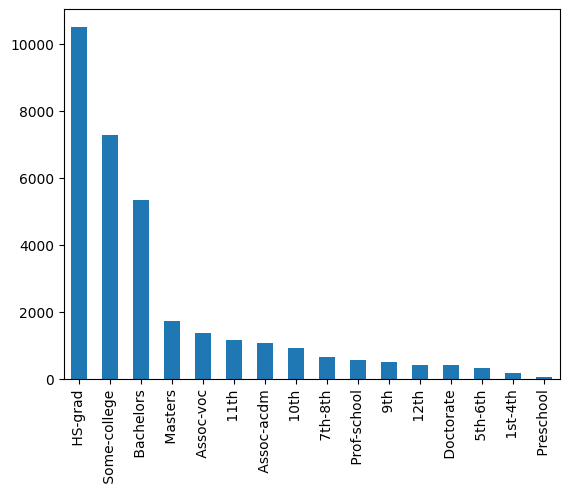

In [11]:
%matplotlib inline
df['education'].value_counts().plot.bar()

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [12]:
print(df[df['income'] == ' <=50K']['age'].mean(),df[df['income'] == ' <=50K']['age'].std())

36.78373786407767 14.02008849082488


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [13]:
for i in list(df[df['income'] == ' >50K']['education'].unique()):
    if  i not in [' Masters',
 ' Bachelors',
 ' Assoc-voc',
 ' Doctorate',
 ' Prof-school',
 ' Assoc-acdm']:
        i = 1
if i == 1:
    print('Не правда')
else:
    print('Правда')

Не правда


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [14]:
a = dict(df[df['income'] == ' >50K']['marital.status'].value_counts().items())
summarried = 0
sumnonmarried =0
summarried2 =0
sumnonmarried2 = 0

for i in a:
    if 'Married' in i:
        summarried += a[i]
    else:
        sumnonmarried += a[i]
c = dict(df['marital.status'].value_counts().items())
for i in c:
    if 'Married' in i:
        summarried2 += c[i]
    else:
        sumnonmarried2 += c[i]
if(summarried/summarried2 > sumnonmarried/sumnonmarried2):
    print('Доля больше среди женатых')
else:
    print('Доля среди холостых')

Доля больше среди женатых


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [15]:
dict(df['native.country'].value_counts().items())
for i in dict(df['native.country'].value_counts().items()):
    print(i,': \n Среднее время работы тех,кто зарабатывает мало',df[df['native.country'] == i][df['income'] == ' <=50K' ]['hours.per.week'].mean(),'часов \n Среднее время работы тех,кто зарабатывает много:',df[df['native.country'] == i][df['income'] == ' >50K' ]['hours.per.week'].mean(),'часов')


<ipython-input-15-05550af27152>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(i,': \n Среднее время работы тех,кто зарабатывает мало',df[df['native.country'] == i][df['income'] == ' <=50K' ]['hours.per.week'].mean(),'часов \n Среднее время работы тех,кто зарабатывает много:',df[df['native.country'] == i][df['income'] == ' >50K' ]['hours.per.week'].mean(),'часов')


 United-States : 
 Среднее время работы тех,кто зарабатывает мало 38.79912723305605 часов 
 Среднее время работы тех,кто зарабатывает много: 45.50536884674383 часов
 Mexico : 
 Среднее время работы тех,кто зарабатывает мало 40.00327868852459 часов 
 Среднее время работы тех,кто зарабатывает много: 46.57575757575758 часов
 ? : 
 Среднее время работы тех,кто зарабатывает мало 40.16475972540046 часов 
 Среднее время работы тех,кто зарабатывает много: 45.54794520547945 часов
 Philippines : 
 Среднее время работы тех,кто зарабатывает мало 38.065693430656935 часов 
 Среднее время работы тех,кто зарабатывает много: 43.032786885245905 часов
 Germany : 
 Среднее время работы тех,кто зарабатывает мало 39.13978494623656 часов 
 Среднее время работы тех,кто зарабатывает много: 44.97727272727273 часов
 Canada : 
 Среднее время работы тех,кто зарабатывает мало 37.91463414634146 часов 
 Среднее время работы тех,кто зарабатывает много: 45.64102564102564 часов
 Puerto-Rico : 
 Среднее время работы тех,

13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [16]:
pd.crosstab(df['education'], ((df['capital.gain']  - df['capital.loss'])  ** (1/5)).fillna(0).astype(int) )

col_0,0,2,3,4,5,6,7,8,9
education,,,,,,,,,
10th,893,1,1,19,13,2,1,1,2
11th,1122,0,5,15,28,5,0,0,0
12th,411,0,3,6,9,3,1,0,0
1st-4th,163,0,0,1,4,0,0,0,0
5th-6th,319,0,0,5,9,0,0,0,0
7th-8th,605,0,0,24,16,1,0,0,0
9th,483,2,2,15,11,0,0,0,1
Assoc-acdm,985,0,0,20,37,22,2,0,1
Assoc-voc,1248,0,2,25,81,22,3,0,1


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [18]:
a = {}
for i in df['native.country'].unique():
    b = df[df['sex'] ==' Female'][df['income'] == ' >50K'][df['native.country'] ==  i].size
    a[i] = b
a = sorted(a.items(), key=lambda x: x[1])
a.reverse()
print("Страны, в которых женщины получают больше 50000 :")
for i,k in zip(a,range(7)):
    print(i[0])

<ipython-input-18-726bb48a63a3>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b = df[df['sex'] ==' Female'][df['income'] == ' >50K'][df['native.country'] ==  i].size


Страны, в которых женщины получают больше 50000 :
 United-States
 ?
 Philippines
 Canada
 Germany
 England
 Japan


15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [25]:
import numpy
a = dict(df[df['income'] == ' >50K']['income'].items())
b = dict(df[df['income'] == ' <=50K']['income'].items())
value = list(range(32561))
for i in a:
    value[i] = int(numpy.random.randint(50,100))
for k in b:
    value[k] = int(numpy.random.randint(0,50))
se = pd.Series(value)
df['magic_salary'] = se.values
for i in dict(df['education'].value_counts().items()):
    many = (df[df['education']==i]['magic_salary']*1000)/(52*df[df['education']==i]['hours.per.week'])
    many = int(many.mean())
    print('Группа людей с', i, 'образованием обычно получает', many,'долларов в час')



Группа людей с  HS-grad образованием обычно получает 17 долларов в час
Группа людей с  Some-college образованием обычно получает 19 долларов в час
Группа людей с  Bachelors образованием обычно получает 22 долларов в час
Группа людей с  Masters образованием обычно получает 27 долларов в час
Группа людей с  Assoc-voc образованием обычно получает 20 долларов в час
Группа людей с  11th образованием обычно получает 20 долларов в час
Группа людей с  Assoc-acdm образованием обычно получает 21 долларов в час
Группа людей с  10th образованием обычно получает 18 долларов в час
Группа людей с  7th-8th образованием обычно получает 17 долларов в час
Группа людей с  Prof-school образованием обычно получает 28 долларов в час
Группа людей с  9th образованием обычно получает 17 долларов в час
Группа людей с  12th образованием обычно получает 17 долларов в час
Группа людей с  Doctorate образованием обычно получает 31 долларов в час
Группа людей с  5th-6th образованием обычно получает 14 долларов в час
Г